In [1]:
import control as ct
import numpy as np
import matplotlib.pyplot as plt

In [2]:
sys1 = ct.ss([[-1, 1], [-10, -1]], np.zeros(2), np.eye(2), 0)
sys2 = ct.ss([[-1, 10], [-1, -1]], np.zeros(2), np.eye(2), 0)

(-2.167145879529595,
 1.1508164704537902,
 -2.1543853375580486,
 0.8828450890513152)

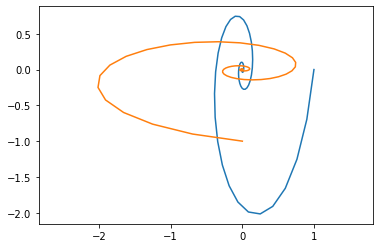

In [3]:
resp1 = ct.initial_response(sys1, 10, [1, 0])
plt.plot(resp1.states[0], resp1.states[1])

resp2 = ct.initial_response(sys2, 10, [0, -1])
plt.plot(resp2.states[0], resp2.states[1])

plt.axis('equal')

In [6]:
# Construct a composite system
def switched_update(t, x, u, p):
    if x[0] > 0 and x[1] < 0:
        return sys1.A @ x
    elif x[0] <= 0 and x[1] < 0:
        return sys2.A @ x
    elif x[0] > 0 and x[1] <= 0:
        return sys1.A @ x
    else:
        return sys2.A @ x
    
sys = ct.NonlinearIOSystem(switched_update, None, states=2, inputs=0, outputs=2)

[ 0.42781015 -0.43900047]


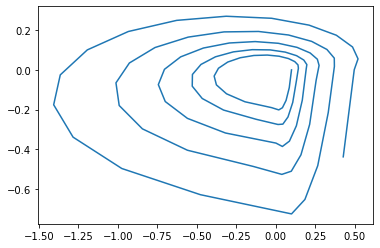

In [7]:
# Simulate
resp = ct.input_output_response(sys, np.linspace(0, 10, 100), 0, [0.1, 0])
plt.plot(resp.states[0], resp.states[1])
print(resp.states[:, -1])